# Example: Compare distributions for common particles in two models

In this example, we generate the pseudorapidity and Feynman-x distributions for selected particles in two models and compare them visually.

Requires extra packages: matplotlib, tqdm, boost-histogram, particle, joblib

In [1]:
import matplotlib.pyplot as plt
import boost_histogram as bh
from tqdm import tqdm
from particle import literals as lp, Particle
import joblib  # only joblib works reliably in notebooks
import numpy as np

from impy.constants import GeV
from impy.kinematics import CenterOfMass
import impy.models as im

In [2]:
# We want to simulate pp interactions at 1 TeV center-of-mass

# The event kinematics objects defines the collision and its frame.
# Here we want pp collisions at 1 TeV center-of-mass energy.
ekin = CenterOfMass(
    100 * GeV,
    "proton",
    "proton"
)

# How many events to generate
n_events = 10000

In [3]:
pid_axis = bh.axis.IntCategory([
    x.pdgid for x in (lp.pi_0, lp.pi_plus, lp.pi_minus, lp.K_plus, lp.K_minus, lp.proton, lp.antiproton)
])

models = [
    im.Sibyll21,
    im.Sibyll23d,
    im.QGSJet01d,
    im.QGSJetII04,
    im.Pythia6,
    im.Pythia8,
]

@joblib.delayed
def run(Model):    
    # Create mode instance here.
    # This typically generates a banner for each model.
    # Models can only be created once.

    m = Model(ekin, 1)
    m.set_stable(lp.pi_0.pdgid)

    # Histogram for Feynman-x distributions
    hx = bh.Histogram(pid_axis, bh.axis.Regular(30, -1, 1))

    # Histogram for pseudorapidity distributions
    heta = bh.Histogram(pid_axis, bh.axis.Regular(30, -7, 7))

    for event in tqdm(m(n_events), total=n_events):
        event = event.final_state() # select only final state particles
        with np.errstate(divide="ignore", invalid="ignore"):
            hx.fill(event.pid, event.xf)
            heta.fill(event.pid, event.eta)

    return m.label, hx, heta

with joblib.Parallel(n_jobs=10, batch_size=1) as pool:
    results = pool(run(m) for m in models)

results = {label: rest for (label, *rest) in results}


 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 |                                                  |
 |           QUARK GLUON STRING JET MODEL           |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |        N.N. KALMYKOV AND

/Users/hdembinski/Extern/impy/src/impy/models/qgsjet.py:74: RuntimeWarning: stable particles cannot be changed in QGSJet01d
  warnings.warn(
  0%|          | 0/10000 [00:00<?, ?it/s] 13401.55it/s]

    1   1.259E+06    8.67  284.75  178.60   35.47   0.125   0.324   8.517
    1   1.585E+06    8.97  294.03  183.68   36.36   0.125   0.307   8.590
    1   1.995E+06    9.28  303.40  188.80   37.27   0.125   0.290   8.663
xmlPath /Users/hdembinski/Extern/impy/src/impy/iamdata/Pythia8/xmldoc/
    1   2.512E+06    9.61  312.87  193.97   38.18   0.125   0.274   8.735
    1   3.162E+06    9.94  322.42  199.18   39.11   0.125   0.259   8.808
    1   3.981E+06   10.29  332.06  204.43   40.05   0.125   0.246   8.882
    1   5.012E+06   10.64  341.79  209.72   41.00   0.125   0.233   8.957
    1   6.310E+06   11.00  351.59  215.05   41.95   0.125   0.220   9.032
    1   7.943E+06   11.38  361.49  220.42   42.92   0.125   0.209   9.101
    1   1.000E+07   11.77  371.46  225.83   43.90   0.125   0.198   9.158

 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
    2   1.000E+01    1.45   23.12   19.9

  4%|▎         | 357/10000 [00:00<00:05, 1690.63it/s]s]

    2   7.943E+05    8.08  223.78  143.66   29.23   0.125   0.232   8.004
    2   1.000E+06    8.37  231.89  148.21   30.02   0.125   0.219   8.090
    2   1.259E+06    8.67  240.09  152.81   30.83   0.125   0.207   8.172
    2   1.585E+06    8.97  248.39  157.46   31.64   0.125   0.196   8.249
    2   1.995E+06    9.28  256.79  162.15   32.47   0.125   0.185   8.324
    2   2.512E+06    9.61  265.28  166.88   33.30   0.125   0.175   8.398
    2   3.162E+06    9.94  273.86  171.66   34.15   0.125   0.165   8.470
    2   3.981E+06   10.29  282.53  176.48   35.01   0.125   0.156   8.542
    2   5.012E+06   10.64  291.29  181.34   35.88   0.125   0.148   8.615
    2   6.310E+06   11.00  300.14  186.25   36.76   0.125   0.140   8.687
    2   7.943E+06   11.38  309.08  191.19   37.64   0.125   0.133   8.756
    2   1.000E+07   11.77  318.10  196.18   38.54   0.125   0.126   8.819

 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------

 79%|███████▊  | 7864/10000 [00:00<00:00, 12786.77it/s]


 *-------  PYTHIA Process Initialization  --------------------------*
 |                                                                  |
 | We collide p+ with p+ at a CM energy of 1.000e+02 GeV            |
 |                                                                  |
 |------------------------------------------------------------------|
 |                                                    |             |
 | Subprocess                                    Code |   Estimated |
 |                                                    |    max (mb) |
 |                                                    |             |
 |------------------------------------------------------------------|
 |                                                    |             |
 | non-diffractive                                101 |   2.613e+01 |
 | A B -> X B single diffractive                  103 |   4.277e+00 |
 | A B -> A X single diffractive                  104 |   4.277e+00 |
 | A B -> X X doubl

 80%|████████  | 8026/10000 [00:00<00:00, 13444.11it/s]


 *-------  PYTHIA Multiparton Interactions Initialization  ---------* 
 |                                                                  | 
 |                   sigmaNonDiffractive =    26.13 mb              | 
 |                                                                  | 
 |    pT0 =  0.91 gives sigmaInteraction =    85.60 mb: accepted    | 
 |                                                                  | 
 *-------  End PYTHIA Multiparton Interactions Initialization  -----* 


 42%|████▏     | 4197/10000 [00:02<00:03, 1533.88it/s]


 *-------  PYTHIA Multiparton Interactions Initialization  ---------* 
 |                                                                  | 
 |   diffraction XB for p+ on p+                                    | 
 |                                                                  | 
 |   diffractive mass = 1.00e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.56 gives sigmaInteraction =    25.04 mb: accepted    | 
 |   diffractive mass = 1.58e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.62 gives sigmaInteraction =    24.16 mb: accepted    | 
 |   diffractive mass = 2.51e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.68 gives sigmaInteraction =    22.42 mb: accepted    | 
 |   diffractive mass = 3.98e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.75 gives sigmaInteraction =    20.27 mb: accepted    | 
 |   diffractive mass = 6.31e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.83 gives sigmaInteraction =    18.46 mb: accepted    | 
 |   

 48%|████▊     | 4837/10000 [00:03<00:03, 1496.53it/s]

+02 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.91 gives sigmaInteraction =    17.03 mb: accepted    | 
 |                                                                  | 
 *-------  End PYTHIA Multiparton Interactions Initialization  -----* 
 PYTHIA Warning in MultipartonInteractions::init: maximum increased by factor 4.142


 55%|█████▍    | 5460/10000 [00:03<00:02, 1530.27it/s]/Users/hdembinski/Extern/impy/src/impy/models/qgsjet.py:74: RuntimeWarning: stable particles cannot be changed in QGSJetII04
  warnings.warn(
  0%|          | 0/10000 [00:00<?, ?it/s]

 done
  qgaini: nuclear cross sections readout from the file sectnu-II-04


 78%|███████▊  | 7761/10000 [00:05<00:01, 1590.58it/s]


 *-------  PYTHIA Multiparton Interactions Initialization  ---------* 
 |                                                                  | 
 |   diffraction AX for p+ on p+                                    | 
 |                                                                  | 
 |   diffractive mass = 1.00e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.56 gives sigmaInteraction =    25.08 mb: accepted    | 
 |   diffractive mass = 1.58e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.62 gives sigmaInteraction =    24.23 mb: accepted    | 
 |   diffractive mass = 2.51e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.68 gives sigmaInteraction =    22.45 mb: accepted    | 
 |   diffractive mass = 3.98e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.75 gives sigmaInteraction =    20.29 mb: accepted    | 
 |   diffractive mass = 6.31e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.83 gives sigmaInteraction =    18.45 mb: accepted    | 
 |   

 84%|████████▍ | 8381/10000 [00:05<00:01, 1447.05it/s]

+02 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.91 gives sigmaInteraction =    17.22 mb: accepted    | 
 |                                                                  | 
 *-------  End PYTHIA Multiparton Interactions Initialization  -----* 


100%|██████████| 10000/10000 [00:06<00:00, 1541.34it/s]



 *-------  PYTHIA Multiparton Interactions Initialization  ---------* 
 |                                                                  | 
 |   diffraction AXB for p+ on p+                                   | 
 |                                                                  | 
 |   diffractive mass = 1.00e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.56 gives sigmaInteraction =     5.85 mb: rejected    | 
 |    pT0 =  0.50 gives sigmaInteraction =     8.79 mb: rejected    | 
 |    pT0 =  0.45 gives sigmaInteraction =    13.12 mb: accepted    | 
 |   diffractive mass = 1.58e+01 GeV and sigmaNorm =    10.00 mb    | 
 |    pT0 =  0.62 gives sigmaInteraction =     4.85 mb: rejected    | 
 |    pT0 =  0.55 gives sigmaInteraction =     7.08 mb: rejected    | 
 |    pT0 =  0.50 gives sigmaInteraction =    10.33 mb: rejected    | 
 |    pT0 =  0.45 gives sigmaInteraction =    15.23 mb: accepted    | 
 |   diffractive mass = 2.51e+01 GeV and sigmaNorm =    10.00 mb    | 
 |   

 11%|█         | 1119/10000 [00:00<00:04, 1917.64it/s]


 Pythia::next(): 1000 events have been generated 


 21%|██▏       | 2133/10000 [00:01<00:03, 2021.22it/s]


 Pythia::next(): 2000 events have been generated 


 29%|██▉       | 2934/10000 [00:01<00:03, 1930.98it/s]


 Pythia::next(): 3000 events have been generated 


 41%|████      | 4111/10000 [00:02<00:03, 1936.50it/s]


 Pythia::next(): 4000 events have been generated 


 49%|████▉     | 4881/10000 [00:02<00:02, 1871.51it/s]


 Pythia::next(): 5000 events have been generated 


 59%|█████▉    | 5892/10000 [00:03<00:02, 1969.06it/s]


 Pythia::next(): 6000 events have been generated 
 PYTHIA Warning in MultipartonInteractions::pTnext: weight above unity  


 71%|███████   | 7099/10000 [00:03<00:01, 1924.80it/s]


 Pythia::next(): 7000 events have been generated 


 79%|███████▉  | 7890/10000 [00:04<00:01, 1918.08it/s]


 Pythia::next(): 8000 events have been generated 


 93%|█████████▎| 9301/10000 [00:04<00:00, 2012.54it/s]


 Pythia::next(): 9000 events have been generated 


100%|██████████| 10000/10000 [00:05<00:00, 1928.39it/s]


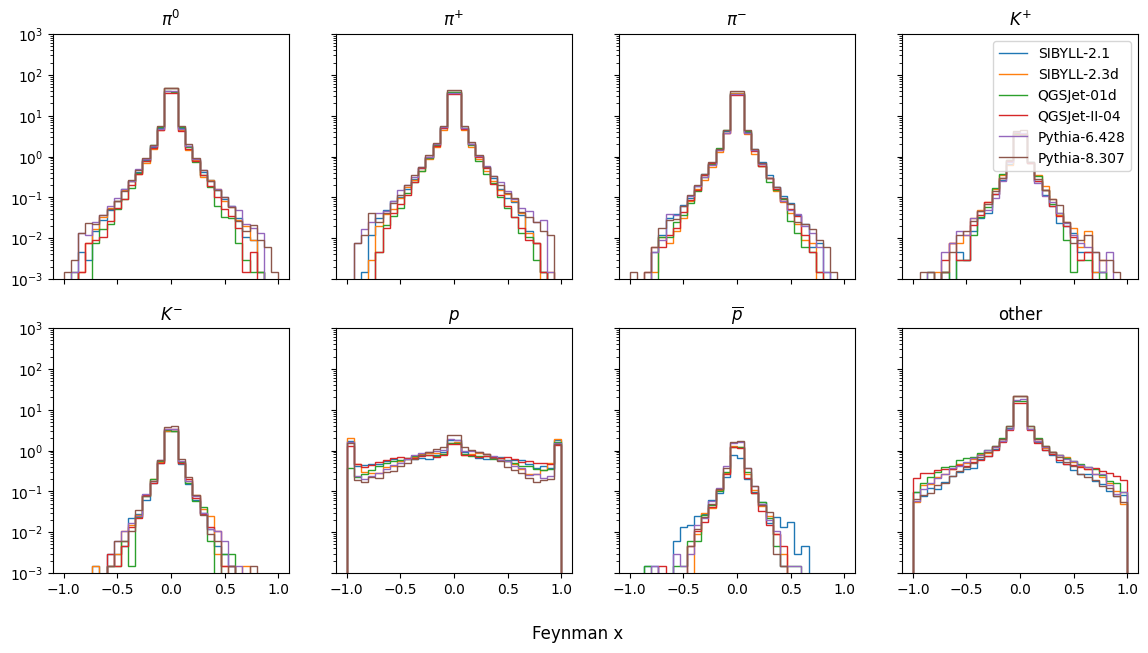

In [4]:
fig, ax = plt.subplots(2, 4, figsize=(14, 7), sharex=True, sharey=True)

# boost-histogram axes contain overflow bins to count everything else,
# we use this here to show a histogram of all other particles
labels = [f"${Particle.from_pdgid(pid).latex_name}$" for pid in pid_axis]
labels += ["other"]

for model, (hx, heta) in results.items():
    a = hx.axes[1]
    values = hx.values(True) # this returns the full histogram including overflow bins
    values = values[:, 1:-1] # strip the overflow bins from the second axis
    labels = [f"${Particle.from_pdgid(pid).latex_name}$" for pid in hx.axes[0]]
    labels += ["other"]
    for i, (label, axi) in enumerate(zip(labels, ax.flat)):
        axi.stairs(values[i] / n_events / a.widths, a.edges, label=model)
        axi.set_title(label)
plt.semilogy()
plt.ylim(1e-3, 1e3)
fig.supxlabel("Feynman x")
ax[0, -1].legend();

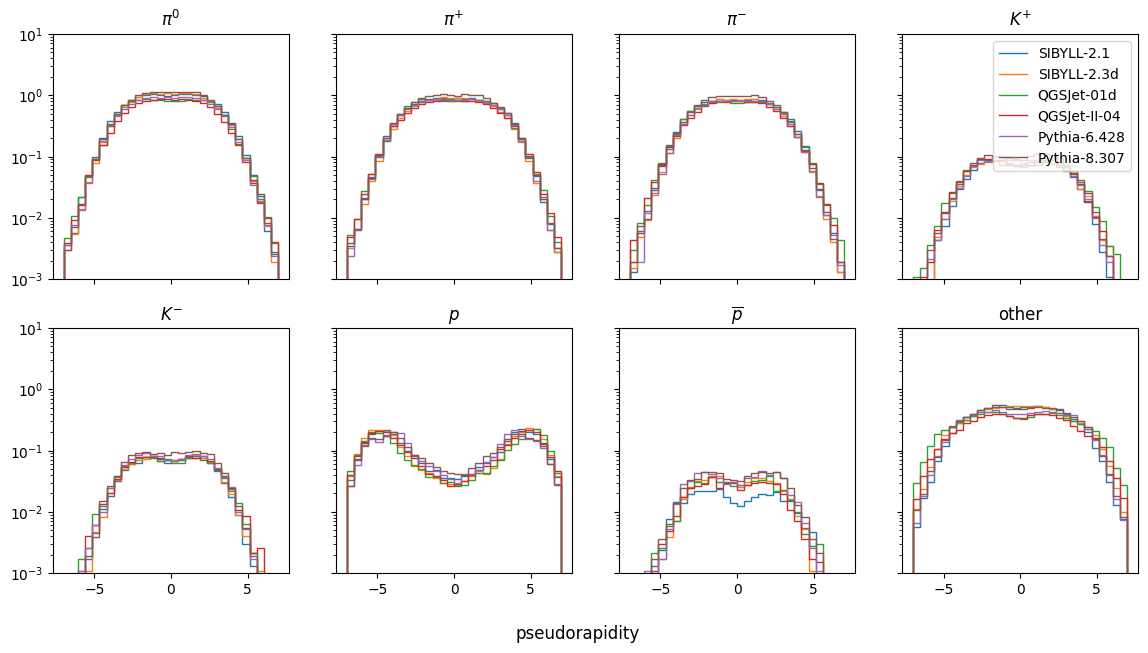

In [5]:
fig, ax = plt.subplots(2, 4, figsize=(14, 7), sharex=True, sharey=True)

for model, (hx, heta) in results.items():
    a = heta.axes[1]
    values = heta.values(True)
    values = values[:, 1:-1]
    for i, (label, axi) in enumerate(zip(labels, ax.flat)):
        axi.stairs(values[i] / n_events / a.widths, a.edges, label=model)
        axi.set_title(label)
plt.semilogy()
plt.ylim(1e-3, 1e1)
fig.supxlabel("pseudorapidity")
ax[0, -1].legend();